In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


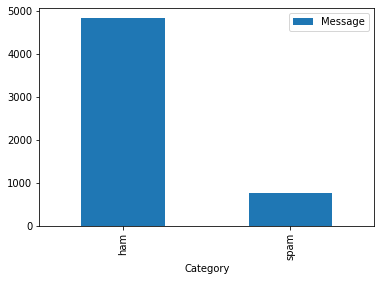

In [5]:
df.groupby('Category').count().plot.bar()

## Text Classification

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [8]:
vec = TfidfVectorizer(lowercase=True)
X = vec.fit_transform(df['Message'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

In [10]:
clf = MultinomialNB()

clf.fit(X_train, y_train)

MultinomialNB()

In [11]:
clf.score(X_test, y_test)

0.9650224215246637

## Save Model

In [14]:
import pickle

In [15]:
pkl_filename = "vec.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(vec, file)

In [16]:
pkl_filename = "clf.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)